In [1]:
from pathlib import Path
import nibabel as nib
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from liver_tk.processing import process_image

In [2]:
unprocessed_data_root_dir = Path("/home/haim/code/tumors/data")
processed_data_root_dir = Path("/home/haim/code/tumors/data/processed")
processed_images_dir: Path = processed_data_root_dir / "volumes"
processed_segments_dir: Path = processed_data_root_dir / "segmentations"

In [3]:
df = pd.read_csv("/home/haim/code/tumors/liver_tumors/image_and_segment_paths.csv")

In [21]:
idx = 60

(512, 512, 75)


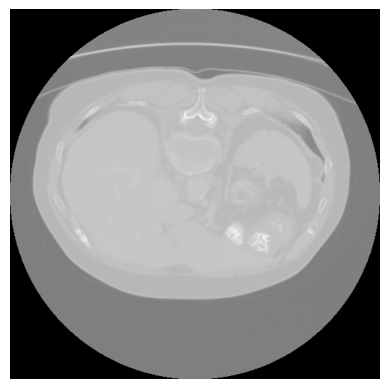

In [22]:
img = nib.load(unprocessed_data_root_dir / df["image_path"][0])
img_data = img.get_fdata()
print(img_data.shape)

# plt.figure(figsize=(10, 10))
plt.imshow(img_data[:, :, idx].T, cmap="gray")
# plt.imshow(mask[:, :, idx].T, cmap="viridis", alpha=0.3)

plt.axis('off')
plt.show()

In [26]:
processed_image, processed_segment, _ = process_image.process_image_and_segment(unprocessed_data_root_dir / df["image_path"][0], unprocessed_data_root_dir / df["segment_path"][0], target_depth=851, window_level=30, window_width=150)

(512, 512, 75)


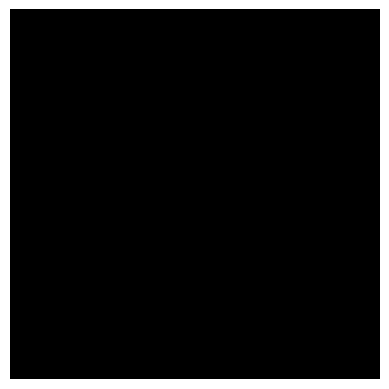

In [37]:
img = nib.load(unprocessed_data_root_dir / df["image_path"][0])
img_data = img.get_fdata()
print(img_data.shape)

# plt.figure(figsize=(10, 10))
plt.imshow(processed_image[:, :, 60].T, cmap="bone")
# plt.imshow(mask[:, :, idx].T, cmap="viridis", alpha=0.3)

plt.axis('off')
plt.show()

In [17]:
processed_image.shape

(512, 512, 851)

In [33]:
windowed_image = process_image.window_image(img_data, 30, 150)

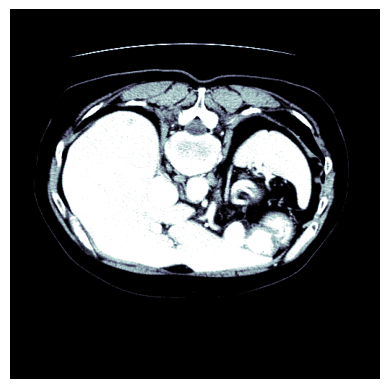

In [35]:
plt.imshow(windowed_image[:, :, 60].T, cmap="bone")
plt.axis('off')
plt.show()

In [52]:
from typing import Tuple
def pad_or_trim(image: np.ndarray, segment: np.ndarray, target_depth: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Adjusts the depth of the input image and segment to match the target depth by either padding or trimming.

    Args:
        image (np.ndarray): The input image array.
        segment (np.ndarray): The input segmentation array.
        target_depth (int): The target depth to which the image and segment should be adjusted.

    Returns:
        Tuple[np.ndarray, np.ndarray]: The adjusted image and segmentation arrays.
    """
    current_depth = image.shape[2]

    if current_depth > target_depth:
        image = image[:, :, :target_depth]
        segment = segment[:, :, :target_depth]
    elif current_depth < target_depth:
        pad_after = target_depth - current_depth
        image = np.pad(image, ((0, 0), (0, 0), (0, pad_after)), 'constant')
        segment = np.pad(segment, ((0, 0), (0, 0), (0, pad_after)), 'constant')

    return image, segment

In [53]:
processed_image, processed_segment = pad_or_trim(windowed_image, processed_segment, 851)

In [62]:
plt.imshow(processed_image[:, :, 75].T, cmap="bone")
plt.axis('off')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'to_sparse'